# Analysing TrumpWorld
Sindre Asplem

21.09.2020

https://www.buzzfeednews.com/article/johntemplon/help-us-map-trumpworld#.ekLzoZ316



In [289]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import csv
from pprint import pprint

from networkx.algorithms.cluster import average_clustering

In [290]:
G = nx.DiGraph()

In [291]:
with open('trumpworld.csv') as csvfile:
	data = csv.reader(csvfile, delimiter='	')

	for row in data:
		# Setting variables
		ent_a_type = row[0]
		ent_a = row[1]
		ent_b_type = row[2]
		ent_b = row[3]
		edge_type = row[4]

		# Add entities to network
		G.add_node(ent_a, type=ent_a_type)
		G.add_node(ent_b, type=ent_b_type)

		G.add_edge(ent_a, ent_b, relation=edge_type)

In [292]:
connected_components = list(nx.strongly_connected_components(G))
print('Number of nodes:', len(G.nodes()))
print('Diameter:', max(nx.diameter(G.subgraph(g).copy()) for g in connected_components))
print('Average clustering:', average_clustering(G))

Number of nodes: 2669
Diameter: 10
Average clustering: 0.08780508509506178


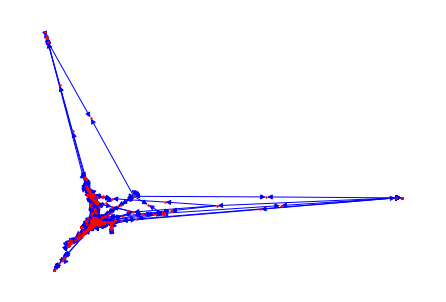

In [293]:
pos = nx.layout.spectral_layout(G) 
nx.draw(G, pos, node_color='r', edge_color='b', node_size=2)

In [294]:
cluster_coeff = nx.clustering(G)

# Convert to DataFrame and sort in decending order
df_cluster_coeff = pd.Series(cluster_coeff).to_frame().reset_index()
df_cluster_coeff.columns = ['Name', 'Clustering_coefficient']
df_cluster_coeff = df_cluster_coeff.sort_values('Clustering_coefficient', ascending=False)

In [295]:
degree = nx.degree(G)
degree = {name: val for (name, val) in degree}

# Convert to DataFrame and sort in decending order
df_degree = pd.Series(degree).to_frame().reset_index()
df_degree.columns = ['Name', 'Degree']
df_degree = df_degree.sort_values('Degree', ascending=False)

In [296]:
closeness_centrality = nx.closeness_centrality(G)

# Convert to DataFrame and sort in decending order
df_closeness_centrality = pd.Series(closeness_centrality).to_frame().reset_index()
df_closeness_centrality.columns = ['Name', 'Closeness_centrality']
df_closeness_centrality = df_closeness_centrality.sort_values('Closeness_centrality', ascending=False)

In [297]:
# Measure betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame and sort in decsending order
df_betweenness_centrality = pd.Series(betweenness_centrality).to_frame().reset_index()
df_betweenness_centrality.columns = ['Name', 'Betweenness_centrality']
df_betweenness_centrality = df_betweenness_centrality.sort_values('Betweenness_centrality', ascending=False)

In [298]:
# Measure degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert to DataFrame and sort in decending order
df_degree_centrality = pd.Series(degree_centrality).to_frame().reset_index()
df_degree_centrality.columns = ['Name', 'Degree_centrality']
df_degree_centrality = df_degree_centrality.sort_values('Degree_centrality', ascending=False)

In [299]:
# Measure the PageRank
pagerank = nx.pagerank(G)

# Convert to DataFrame and sort in decending order
df_pagerank = pd.Series(pagerank).to_frame().reset_index()
df_pagerank.columns = ['Name', 'PageRank']
df_pagerank = df_pagerank.sort_values('PageRank', ascending=False)

In [300]:
# Measure eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Convert to DataFrame and sort in decending order
df_eigenvector_centrality = pd.Series(eigenvector_centrality).to_frame().reset_index()
df_eigenvector_centrality.columns = ['Name', 'Eigenvector_centrality']
df_eigenvector_centrality = df_eigenvector_centrality.sort_values('Eigenvector_centrality', ascending=False)

In [301]:
dfs = [
    df_degree,
    df_cluster_coeff,
    df_closeness_centrality,
    df_betweenness_centrality,
    df_degree_centrality,
    df_pagerank, 
    df_eigenvector_centrality
]

df_names = [
    'Clustering Coefficient'
    'Degree',
    'Closeness Centrality',
    'Betweenness Centrality',
    'Degree Centrality',
    'PageRank',
    'Eigenvector Centrality'
]

In [302]:
# Check for null values in centrality dataframes
for name, df in zip(df_names, dfs):
    print(f'Nullvalues in {name}:', df.isnull().values.any())

Nullvalues in Clustering CoefficientDegree: False
Nullvalues in Closeness Centrality: False
Nullvalues in Betweenness Centrality: False
Nullvalues in Degree Centrality: False
Nullvalues in PageRank: False
Nullvalues in Eigenvector Centrality: False


In [303]:
from functools import reduce

# Merge all dfs into one
df_centrality = reduce(lambda left,right: pd.merge(left,right,on='Name'), dfs).sort_values('PageRank', ascending=False)

display(df_centrality[:10])

,Name,Degree,Clustering_coefficient,Closeness_centrality,Betweenness_centrality,Degree_centrality,PageRank,Eigenvector_centrality
3,"MAR-A-LAGO CLUB, INC",110,0.000584,0.034705,0.000038,0.041229,0.021555,0.077171
977,"MAR-A-LAGO CLUB, LLC",2,0.500000,0.023478,0.000000,0.000750,0.009420,0.051187
2413,"MALC, INC.",1,0.000000,0.021691,0.000000,0.000375,0.009419,0.029840
11,40 WALL STREET LLC,41,0.001829,0.015524,0.000021,0.015367,0.008522,0.049573
15,NITTO WORLD CO. LIMITED,36,0.024603,0.015104,0.000000,0.013493,0.007867,0.120280
1001,40 WALL STREET COMMERCIAL LLC,2,0.500000,0.013166,0.000000,0.000750,0.007511,0.040519
21,"TRUMP HOTELS & CASINO RESORTS, INC.",30,0.001149,0.012181,0.000000,0.011244,0.006836,0.021347
6,"THE TRUMP ORGANIZATION, INC.",48,0.009752,0.014659,0.000241,0.017991,0.005728,0.119343
49,JONES DAY,12,0.037879,0.009306,0.000000,0.004498,0.004638,0.084734
14,KUSHNER COMPANIES,37,0.003754,0.015668,0.003011,0.013868,0.004500,0.092041


Looking at paths between central nodes:

In [304]:
def print_path(G, source, target='DONALD J. TRUMP'):
    if nx.has_path(G, source=source, target=target):
        path_s_t = nx.bidirectional_shortest_path(G, source=source, target=target)
        print(f'Path {source} -> {target}:', path_s_t)
        for i in range(len(path_s_t)-1):
            rel = G.get_edge_data(path_s_t[i], path_s_t[i + 1])
            print(f"{path_s_t[i]} - {rel['relation']} - {path_s_t[i + 1]}")
        print()
    elif nx.has_path(G, target, source):
        print_path(G, target, source)
    else:
        print(f'No path found between {source} and {target}')
    

In [305]:
def print_edges(G, node):
    in_edges = [n for n, _ in G.in_edges(node)]
    out_edges = [n for _, n in G.out_edges(node)]

    print(f'{node} in_edges:')
    pprint(in_edges)
    print()
    print(f'{node} out_edges:')
    pprint(out_edges)

In [306]:
print_path(G, 'KUSHNER COMPANIES', 'GEORGE SOROS')

Path KUSHNER COMPANIES -> GEORGE SOROS: ['KUSHNER COMPANIES', 'WESTMINSTER MANAGEMENT', 'JARED KUSHNER', 'REALCADRE LLC', 'SOROS FUND MANAGEMENT, LLC', 'GEORGE SOROS']
KUSHNER COMPANIES - Ownership - WESTMINSTER MANAGEMENT
WESTMINSTER MANAGEMENT - Former managing member - JARED KUSHNER
JARED KUSHNER - Investor - REALCADRE LLC
REALCADRE LLC - Soros Fund Management has quietly been financing the Kushner-backed real estate finance startup Cadre with a substantial credit line, according to The Real Deal - SOROS FUND MANAGEMENT, LLC
SOROS FUND MANAGEMENT, LLC - Chairman - GEORGE SOROS



In [307]:
print_edges(G, 'GEORGE SOROS')
print()

print_path(G, source='GEORGE SOROS', target='DONALD J. TRUMP')

GEORGE SOROS in_edges:
['SOROS FUND MANAGEMENT, LLC']

GEORGE SOROS out_edges:
['STEVEN MNUCHIN']

Path DONALD J. TRUMP -> GEORGE SOROS: ['DONALD J. TRUMP', 'JARED KUSHNER', 'REALCADRE LLC', 'SOROS FUND MANAGEMENT, LLC', 'GEORGE SOROS']
DONALD J. TRUMP - Senior adviser - JARED KUSHNER
JARED KUSHNER - Investor - REALCADRE LLC
REALCADRE LLC - Soros Fund Management has quietly been financing the Kushner-backed real estate finance startup Cadre with a substantial credit line, according to The Real Deal - SOROS FUND MANAGEMENT, LLC
SOROS FUND MANAGEMENT, LLC - Chairman - GEORGE SOROS



In [308]:
print_path(G, 'STEVEN MNUCHIN')
print_path(G, 'GEORGE SOROS', 'STEVEN MNUCHIN')

Path DONALD J. TRUMP -> STEVEN MNUCHIN: ['DONALD J. TRUMP', 'STEVEN MNUCHIN']
DONALD J. TRUMP - Secretary of Treasury - STEVEN MNUCHIN

Path GEORGE SOROS -> STEVEN MNUCHIN: ['GEORGE SOROS', 'STEVEN MNUCHIN']
GEORGE SOROS - Mnuchin worked for Soros' fund - STEVEN MNUCHIN



In [309]:
display(df_centrality.loc[df_centrality['Name'] == 'DJT HOLDINGS LLC'])
print_edges(G, 'DJT HOLDINGS LLC')
print()

source = 'DONALD J. TRUMP'
target = 'DJT HOLDINGS LLC'
rel = G.get_edge_data(source, target)["relation"]
print(f'{source} {rel} {target}', end = '\n\n')


for source, target in G.out_edges('DJT HOLDINGS LLC'):
    rel = G.get_edge_data(source, target)["relation"]
    print(f'{source} {rel} {target}')

,Name,Degree,Clustering_coefficient,Closeness_centrality,Betweenness_centrality,Degree_centrality,PageRank,Eigenvector_centrality
16,DJT HOLDINGS LLC,36,0.02381,0.005536,0.000139,0.013493,0.000505,0.053276


DJT HOLDINGS LLC in_edges:
['DEUTSCHE BANK',
 'DJT HOLDINGS MANAGING MEMBER LLC',
 'DONALD J. TRUMP',
 'THE DONALD J. TRUMP REVOCABLE TRUST']

DJT HOLDINGS LLC out_edges:
['4 SHADOW TREE LANE LLC',
 '809 NORTH CANON LLC',
 'DT CONNECT II LLC',
 'LFB ACQUISITION LLC',
 'OPO HOTEL MANAGER LLC',
 'PINE HILL DEVELOPMENT LLC',
 'SEVEN SPRINGS LLC',
 'THC VENTURE I LLC',
 'TIHT CHICAGO MEMBER ACQUISITION LLC',
 'TNGC JUPITER MANAGEMENT LLC',
 'TRUMP BRIARCLIFF MANOR DEVELOPMENT LLC',
 'TRUMP CHICAGO MANAGING MEMBER LLC',
 'TRUMP CHICAGO MEMBER LLC',
 'TRUMP LAS VEGAS MANAGING MEMBER LLC',
 'TRUMP LAS VEGAS MEMBER LLC',
 'TRUMP MARKS ASIA LLC',
 'TRUMP NATIONAL DORAL',
 'TRUMP NATIONAL GOLF CLUB - CHARLOTTE',
 'TRUMP NATIONAL GOLF CLUB - HUDSON VALLEY',
 'TRUMP NATIONAL GOLF CLUB - JUPITER',
 'TRUMP NATIONAL GOLF CLUB - PHILADELPHIA',
 'TRUMP NATIONAL GOLF CLUB - WESTCHESTER',
 'TRUMP NATIONAL GOLF CLUB WASHINGTON DC LLC',
 'TRUMP OLD POST OFFICE LLC',
 'TRUMP SCOTSBOROUGH SQUARE LLC',
 'TRUM

In [310]:
# Checking for any correlation between centrality measures.
corrs = df_centrality.corr(method='pearson')
display(corrs)


,Degree,Clustering_coefficient,Closeness_centrality,Betweenness_centrality,Degree_centrality,PageRank,Eigenvector_centrality
Degree,1.000000,-0.004923,0.106237,0.739780,1.000000,0.175311,0.162228
Clustering_coefficient,-0.004923,1.000000,0.115961,-0.018098,-0.004923,0.019091,0.380334
Closeness_centrality,0.106237,0.115961,1.000000,0.140383,0.106237,0.446053,0.633862
Betweenness_centrality,0.739780,-0.018098,0.140383,1.000000,0.739780,0.091038,0.193435
Degree_centrality,1.000000,-0.004923,0.106237,0.739780,1.000000,0.175311,0.162228
PageRank,0.175311,0.019091,0.446053,0.091038,0.175311,1.000000,0.341430
Eigenvector_centrality,0.162228,0.380334,0.633862,0.193435,0.162228,0.341430,1.000000


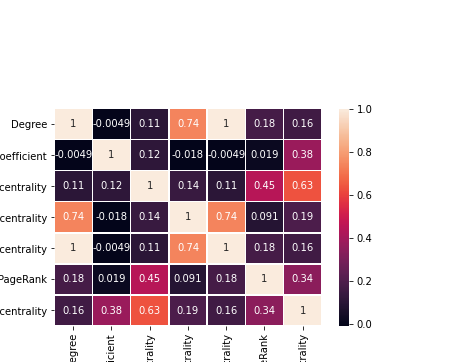

In [311]:
import seaborn as sns

sns.heatmap(corrs, annot=True, linewidths=.5, vmin=-.01, vmax=1)
plt.show()